# Actual

In [103]:
import pickle
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [104]:
list_num_user = [
                100, 
                 500, 
                 1000
                 ]

In [105]:
from matplotlib.gridspec import GridSpec
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


In [ ]:
def forward(x):
    return x**(1/10)

def inverse(x):
    return x**10 * np.sign(x)

exp_type="fair"
# exp_type="unfair"

fig = plt.figure(constrained_layout=True, figsize=(12,13))

gs = GridSpec(3, 6, figure=fig)

ax1 = fig.add_subplot(gs[0, :3])
ax2 = fig.add_subplot(gs[0, 3:])
ax3 = fig.add_subplot(gs[1, :3])
ax4 = fig.add_subplot(gs[1, 3:])
ax5 = fig.add_subplot(gs[2, :2])
ax6 = fig.add_subplot(gs[2, 2:4])
ax7 = fig.add_subplot(gs[2, 4:])
for i, num_user in enumerate(list_num_user):

    with open(f"artificial_insert_{exp_type}_user_{str(num_user).zfill(4)}_exact_km.pickle", "rb") as f:
        result = pickle.load(f)

    df = pd.DataFrame(result)
    df.columns = df.columns.astype(int) /10
    df.index = df.index.str.strip("@10")
    df = df[~df.index.str.contains("IAA_our")]
    df = df.unstack().reset_index()
    df.columns = ["position","measure","score"]
    df = df.set_index("measure")

    selected_index = df.index.unique()

    rel_measures = selected_index[~selected_index.str.contains("_")]
    fair_measures = selected_index[selected_index.str.contains("_")]
    only_fair_measures =fair_measures[~(fair_measures.str.contains("I")|fair_measures.str.contains("M"))]
    fair_with_rel_measures = fair_measures[(fair_measures.str.contains("I")|fair_measures.str.contains("M"))]

    only_fair_measures_higher_better  = only_fair_measures[only_fair_measures.str.contains("Jain|QF|Ent|FSat")]
    only_fair_measures_higher_worse  = only_fair_measures[~only_fair_measures.str.contains("Jain|QF|Ent|FSat")]
    IBO_IWO = fair_with_rel_measures[fair_with_rel_measures.str.contains("IBO|IWO")]
    fair_with_rel_measures_higher_worse = fair_with_rel_measures[~fair_with_rel_measures.str.contains("IBO|IWO")]

    thisdata = df

    rel_result = thisdata.loc[rel_measures].reset_index()
    only_fair_result_higher = thisdata.loc[only_fair_measures_higher_better].reset_index()
    only_fair_result_lower = thisdata.loc[only_fair_measures_higher_worse].reset_index()
    fair_w_rel_result_higher = thisdata.loc[IBO_IWO].reset_index()
    fair_w_rel_result_lower = thisdata.loc[fair_with_rel_measures_higher_worse].reset_index()

    splitted_fair_higher = only_fair_result_higher.measure.str.rsplit("_",1)
    only_fair_result_higher["version"] = [x[1] for x in splitted_fair_higher]

    splitted_fair_lower = only_fair_result_lower.reset_index().measure.str.rsplit("_",1)
    only_fair_result_lower["version"] = [x[1] for x in splitted_fair_lower]

    splitted_fair_rel_higher = fair_w_rel_result_higher.measure.str.rsplit("_",1)
    fair_w_rel_result_higher["version"] = [x[1] for x in splitted_fair_rel_higher]

    splitted_fair_rel_lower = fair_w_rel_result_lower.measure.str.rsplit("_",1)
    fair_w_rel_result_lower["version"] = [x[1] for x in splitted_fair_rel_lower]

    only_fair_result_higher["measure"] = only_fair_result_higher["measure"].str.replace("_.*","")
    only_fair_result_lower["measure"] = only_fair_result_lower["measure"].str.replace("_.*","")
    fair_w_rel_result_higher["measure"] = fair_w_rel_result_higher["measure"].str.replace("_.*","")
    fair_w_rel_result_higher["measure"] = fair_w_rel_result_higher.measure.str.replace("IBO","$\\uparrow$IBO", regex=False)
    fair_w_rel_result_higher["measure"] = fair_w_rel_result_higher.measure.str.replace("IWO","$\\downarrow$IWO", regex=False)
    fair_w_rel_result_lower["measure"] = fair_w_rel_result_lower["measure"]\
                                    .str.replace("_pred","-pred")\
                                    .str.replace("_true","-true")\
                                    .str.replace("_.*","")

    plotting_dict = {"x":"position", "y":"score", "hue":"measure", "palette":"colorblind","markersize":10}

    if num_user == 1000:

        sns.lineplot(data=rel_result, ax=ax1, style="measure", markers=["","",4,"", 5,""], **plotting_dict)

        for version, marker in zip(['ori','our'],["x","o"]):
            sns.lineplot(data=only_fair_result_higher[only_fair_result_higher.version==version], ax=ax2, style="measure", markers=marker, dashes=True, mec=None,
                        mfc="none", **plotting_dict)
            sns.lineplot(data=only_fair_result_lower[only_fair_result_lower.version==version], ax=ax3,  markers=marker, style="version", dashes=False, mec=None,
                        mfc="none", **plotting_dict)
            sns.lineplot(data=fair_w_rel_result_higher[fair_w_rel_result_higher.version==version], ax=ax4,  markers=marker,  style="version", dashes=False,mec=None,
                        mfc="none", **plotting_dict)

    if num_user==100:
        sns.lineplot(data=fair_w_rel_result_lower[fair_w_rel_result_lower.version=="ori"], ax=ax5, markers="x",  style="version", dashes=False,mec=None,
                        mfc="none",**plotting_dict)
    elif num_user==500:
        sns.lineplot(data=fair_w_rel_result_lower[fair_w_rel_result_lower.version=="ori"],  ax=ax6, markers="x",  style="version", dashes=False,mec=None,
                        mfc="none",**plotting_dict)
    elif num_user==1000:
        sns.lineplot(data=fair_w_rel_result_lower[fair_w_rel_result_lower.version=="ori"],  ax=ax7, markers="x",  style="version", dashes=False,mec=None,
                        mfc="none",**plotting_dict)


ax1.set_title(f"$\\uparrow$Relevance measures ($m=${num_user})")
ax2.set_title(f"$\\uparrow$Fairness-only measures ($m=${num_user})")
ax3.set_title(f"$\\downarrow$Fairness-only measures ($m=${num_user})")
ax4.set_title(f"Fairness-with-relevance measures ($m=${num_user})")

ax5.set_title(f"$\\downarrow$Fairness-with-relevance measures ($m=100$)", size=10)
ax6.set_title(f"$\\downarrow$Fairness-with-relevance measures ($m=500$)", size=10)
ax7.set_title(f"$\\downarrow$Fairness-with-relevance measures ($m=1000$)", size=10)


for this_ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:

    this_ax.set_xlabel("fraction of artificially inserted items")
    this_ax.set(xticks=np.linspace(0, 1, num=11))
    this_ax.tick_params(axis='x', which='major', labelsize=7.5, rotation=0)

handles, ori_labels = ax4.get_legend_handles_labels()
ori_our = [(handle, ori_label) for handle, ori_label in zip(handles, ori_labels) if ori_label in ["ori","our"]]
new_handle = [x[0] for x in ori_our]
new_labels = [x[1] for x in ori_our]

fig.legend(new_handle, new_labels, 
        loc='upper center', 
        bbox_to_anchor=(0.525, 1.020), ncol=len(new_labels)
        )

handles, ori_labels = ax1.get_legend_handles_labels()
ax1.legend(handles[0:], ori_labels[0:])   

#fake plot to get legend for Jain, QF, etc
for_legend = plt.figure()
sns.lineplot(data=only_fair_result_higher[only_fair_result_higher.version==version], style="measure", dashes=True,mec=None, mfc="none",**plotting_dict)

ax2_handle, ax2_label = plt.gca().get_legend_handles_labels()
ax2.legend(ax2_handle, ax2_label)    

handles, ori_labels = ax3.get_legend_handles_labels()
ax3.legend(handles[1:4], ori_labels[1:4])   

handles, ori_labels = ax4.get_legend_handles_labels()
ax4.legend(handles[1:3], ori_labels[1:3])   

for this_ax in [ax5, ax6, ax7]:
    handles, ori_labels = this_ax.get_legend_handles_labels()
    this_ax.legend(handles[1:-2], ori_labels[1:-2])   


plt.tight_layout()    



## 100, 500

In [93]:
%%capture
ori_our = pd.DataFrame(np.ones((2,3)),columns=["x","y","version"])
ori_our["version"] = ["ori","our"]
for_legend, ax_legend = plt.subplots(1,1)
additional_plotting_dict = {"mec":None,"mfc":"none"}
_ = sns.lineplot(x="x",y="y", data=ori_our.query("version=='ori'"), style='version', markers=["x"], dashes=False, **additional_plotting_dict)
_ = sns.lineplot(x="x",y="y", data=ori_our.query("version=='our'"), style='version', markers=["o"], dashes=False, **additional_plotting_dict)

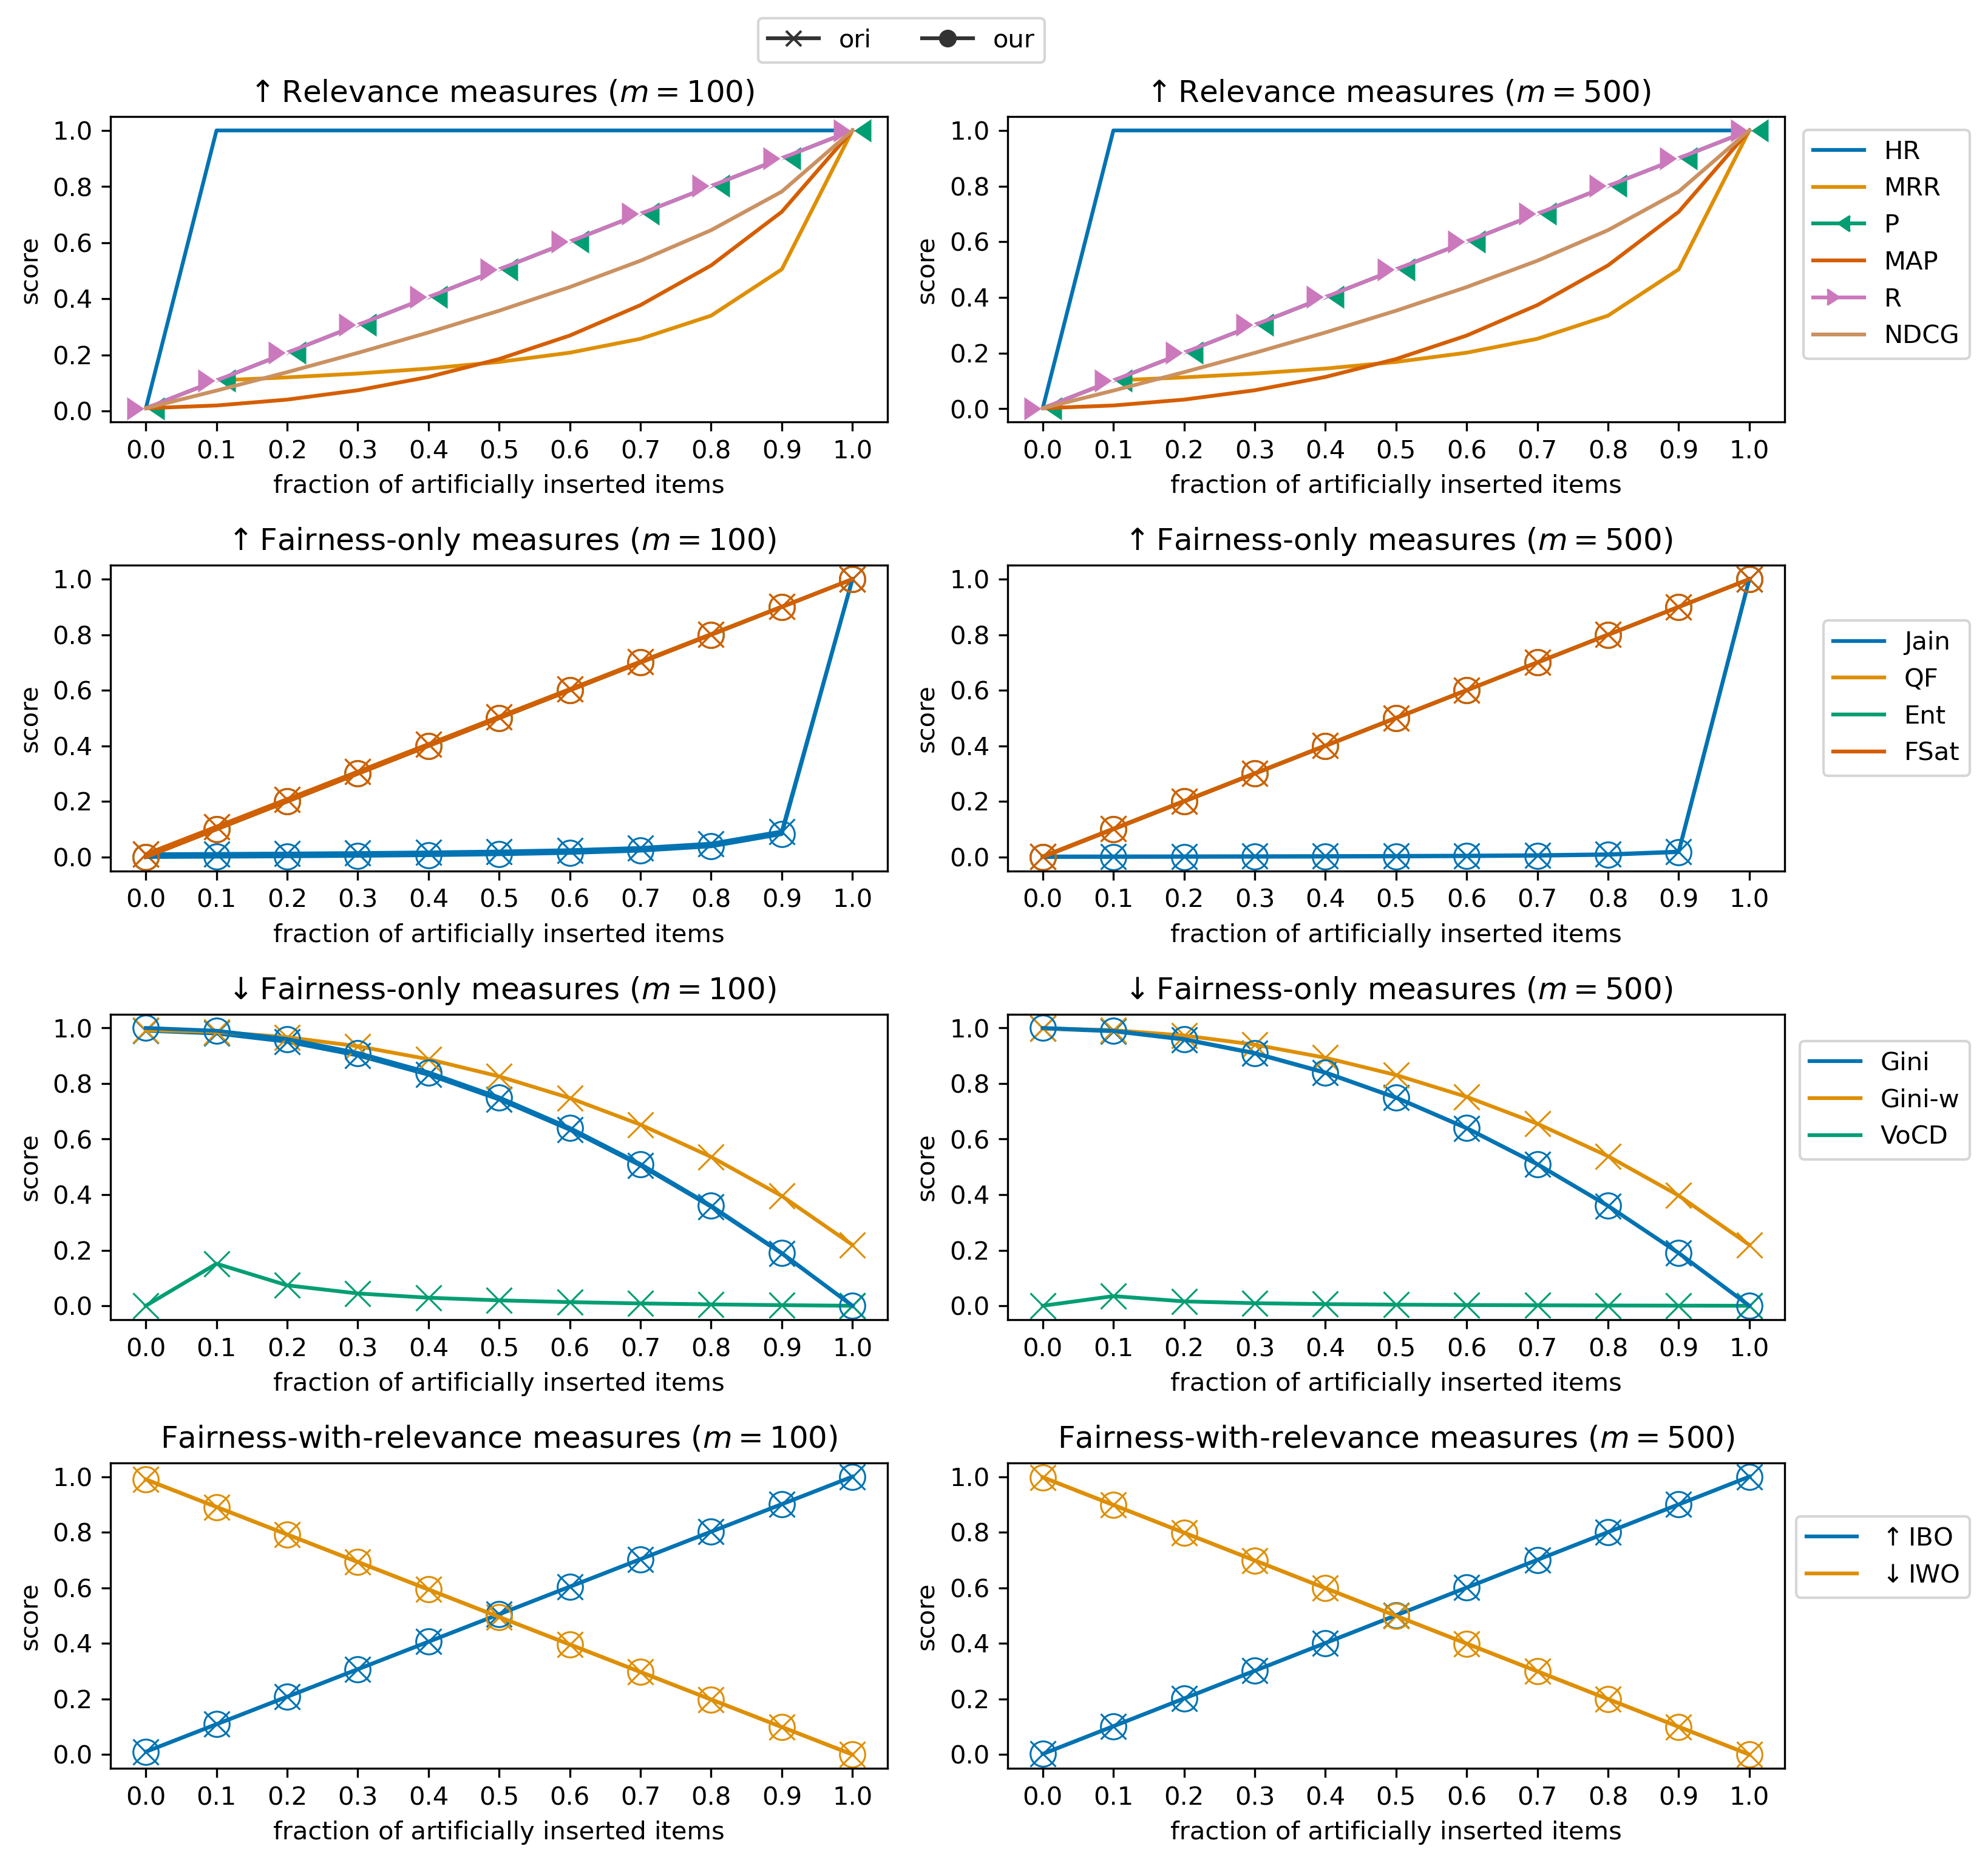

In [102]:
def forward(x):
    return x**(1/10)

def inverse(x):
    return x**10 * np.sign(x)

def plot_df(df,i, ax, num_user):
    df = df.unstack().reset_index()
    df.columns = ["position","measure","score"]
    df = df.set_index("measure")

    selected_index = df.index.unique()

    rel_measures = selected_index[~selected_index.str.contains("_")]
    fair_measures = selected_index[selected_index.str.contains("_")]
    only_fair_measures =fair_measures[~(fair_measures.str.contains("I")|fair_measures.str.contains("M"))]
    fair_with_rel_measures = fair_measures[(fair_measures.str.contains("I")|fair_measures.str.contains("M"))]

    only_fair_measures_higher_better  = only_fair_measures[only_fair_measures.str.contains("Jain|QF|Ent|FSat")]
    only_fair_measures_higher_worse  = only_fair_measures[~only_fair_measures.str.contains("Jain|QF|Ent|FSat")]
    fair_with_rel_measures_higher_better = fair_with_rel_measures[fair_with_rel_measures.str.contains("IBO|IWO")]

    thisdata = df

    rel_result = thisdata.loc[rel_measures].reset_index()
    only_fair_result_higher = thisdata.loc[only_fair_measures_higher_better].reset_index()
    only_fair_result_lower = thisdata.loc[only_fair_measures_higher_worse].reset_index()
    fair_w_rel_result_higher = thisdata.loc[fair_with_rel_measures_higher_better].reset_index()

    splitted_fair_higher = only_fair_result_higher.measure.str.rsplit("_",1)
    only_fair_result_higher["version"] = [x[1] for x in splitted_fair_higher]

    splitted_fair_lower = only_fair_result_lower.reset_index().measure.str.rsplit("_",1)
    only_fair_result_lower["version"] = [x[1] for x in splitted_fair_lower]

    splitted_fair_rel_higher = fair_w_rel_result_higher.measure.str.rsplit("_",1)
    fair_w_rel_result_higher["version"] = [x[1] for x in splitted_fair_rel_higher]

    only_fair_result_higher["measure"] = only_fair_result_higher["measure"].str.replace("_.*","")
    only_fair_result_lower["measure"] = only_fair_result_lower["measure"].str.replace("_.*","")
    fair_w_rel_result_higher["measure"] = fair_w_rel_result_higher["measure"].str.replace("_.*","")\
                                                                .str.replace("IBO","$\\uparrow$IBO", regex=False)\
                                                                .str.replace("IWO","$\\downarrow$IWO", regex=False)

    plotting_dict = {"x":"position", "y":"score", "hue":"measure", 
                     "dashes": False,"palette":"colorblind","markersize":10}
    sns.lineplot(data=rel_result, ax=ax[0,i], style="measure", markers=["","",4,"", 5,""],**plotting_dict)

    for ver, marker in zip(["ori", "our"],["x","o"]):

        sns.lineplot(data=only_fair_result_higher.query("version==@ver"), ax=ax[1,i], style="version", markers=marker, **plotting_dict, **additional_plotting_dict)
        sns.lineplot(data=only_fair_result_lower.query("version==@ver"), ax=ax[2,i], style="version",  markers=marker, **plotting_dict,**additional_plotting_dict)
        sns.lineplot(data=fair_w_rel_result_higher.query("version==@ver"), ax=ax[3,i], style="version",  markers=marker, **plotting_dict, **additional_plotting_dict)
    
    ax[0,i].set_title(f"$\\uparrow$Relevance measures ($m=${num_user})")
    ax[1,i].set_title(f"$\\uparrow$Fairness-only measures ($m=${num_user})")
    ax[2,i].set_title(f"$\\downarrow$Fairness-only measures ($m=${num_user})")
    ax[3,i].set_title(f"Fairness-with-relevance measures ($m=${num_user})")
  
    for j in range(4):
        ax[j,i].set_xlabel("fraction of artificially inserted items")
        ax[j,i].set(xticks=np.linspace(0, 1, num=11))
        ax[j,i].tick_params(axis='x', which='major')

def handle_legend(fig, ax):

                
    # https://stackoverflow.com/questions/9834452/how-do-i-make-a-single-legend-for-many-subplots

    for row in range(4):
        handles, ori_labels = ax[row,1].get_legend_handles_labels()

        axbox = ax[row,1].get_position()
        loc_dict = {
                    0:[axbox.x1+0.55*axbox.width, axbox.y1+0.5*axbox.height],
                    1:[axbox.x1+0.55*axbox.width, axbox.y1+0.015],
                    2:[axbox.x1+0.55*axbox.width, axbox.y1-0.015],
                    3:[axbox.x1+0.55*axbox.width, axbox.y1-0.075],
        }

        if row == 0:
            fig.legend(handles, ori_labels, 
                bbox_to_anchor=loc_dict[row]
                )
        else:        
            fig.legend(handles[1:6-row], ori_labels[1:6-row], 
                bbox_to_anchor=loc_dict[row]
                )
     # #takeout legend
    handles, ori_labels = ax_legend.get_legend_handles_labels()

    fig.legend(handles[-2:], ori_labels[-2:], 
            loc='upper center', bbox_to_anchor=(0.5, 1.025), ncol=2)
    [[c.get_legend().remove() for c in r] for r in ax]
    
def plot(exp_type:str, list_num_user:list):
    fig, ax= plt.subplots(4, 2, figsize=(10,10))

    now = datetime.now()
    time = str(now.strftime("%Y-%m-%d"))
    for i, num_user in enumerate(list_num_user):

        with open(f"artificial_insert_{exp_type}_user_{str(num_user).zfill(4)}_exact_km.pickle", "rb") as f:
            result = pickle.load(f)

        df = pd.DataFrame(result)
        df.columns = df.columns.astype(int) /10
        df.index = df.index.str.strip("@10")
        df = df[~df.index.str.contains("IAA_our")]
        plot_df(df, i, ax, num_user)

    handle_legend(fig, ax)
    plt.tight_layout()    

markers = ["o","X"]
plot("fair",[100,500])